Loading the Baseball Files

Baseball Analysis
a. Correlation between Players Perfromace Metrics
b. Characteristics of Highly Paid Players
c. Just a sneak peak of Cubs vs Whitesox Comparision

In [ ]:
#Common Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#For better plotting
import seaborn as sns
#To print all graphs inline
%matplotlib inline  

#To run all output blocks of the code in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [151]:
#Reading Input Data
teamInfo = pd.read_csv("Teams.csv")
playerInfo = pd.read_csv("Master.csv")
salaryInfo = pd.read_csv("Salaries.csv")
battingInfo = pd.read_csv("Batting.csv")
pitchingInfo = pd.read_csv("Pitching.csv")
#teamInfo.head()

For a Baseball team to win a game, it needs to score more runs than it allows. 

Most teams focused on Batting Average (BA) as a statistic to improve their runs Scored. Bill Beane took a different approach, he focused on improving On Base Percentage (OBP), and Slugging Percentage (SLG).

Rank: Position in final standings
R: Runs scored
RA: Opponents runs scored
G: Games played
W: Wins
H: Hits by batters
BB: Walks by batters
HBP: Batters hit by pitch
AB: At bats
SF: Sacrifice flies
HR: Homeruns by batters
2B: Doubles
3B: Triples

The Batting Average is defined by the number of hits divided by at bats. 
It can be calculated using the formula below:

BA = H/AB

On-base Percentage is a measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference. It can be calculated using the formula below:

OBP = (H+BB+HBP)/(AB+BB+HBP+SF)

Slugging Percentage is a measure of the power of a hitter. It can ve calculated using the formula below:

SLG = H+2B+(2*3B)+(3*HR)/AB

Based on the analysis above, a good strategy for recruiting batters would focus on targeting undervalued players with high OBP and SLG. In the late 1990s, the old school scouts overvalued BA, and players with high BA had high salaries. Although BA and OBP have a positive correlation, there were some players that have high OBP and SLG, and relatively small BA. These players were undervalued by the market, and were the target of Billy Beane.

In [152]:
teamInfo = teamInfo[teamInfo['yearID'] > 2013]
teamInfo = teamInfo[['yearID','teamID','name','park','lgID','divID','Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B', 'ERA']]
teamInfo.head()

yearID teamID                  name                         park lgID  \
2745    2014    ARI  Arizona Diamondbacks                  Chase Field   NL   
2746    2014    ATL        Atlanta Braves                 Turner Field   NL   
2747    2014    BAL     Baltimore Orioles  Oriole Park at Camden Yards   AL   
2748    2014    BOS        Boston Red Sox               Fenway Park II   AL   
2749    2014    CHA     Chicago White Sox          U.S. Cellular Field   AL   

     divID  Rank    R   RA    G   W     H   BB   HBP    AB    SF   HR   2B  \
2745     W     5  615  742  162  64  1379  398  43.0  5552  36.0  118  259   
2746     E     2  573  597  162  79  1316  472  43.0  5468  27.0  123  240   
2747     E     1  705  593  162  96  1434  401  62.0  5596  36.0  211  264   
2748     E     5  634  715  162  71  1355  535  68.0  5551  52.0  123  282   
2749     C     4  660  758  162  73  1400  417  60.0  5543  38.0  155  279   

      3B   ERA  
2745  47  4.26  
2746  22  3.38  
2747  16  3.43  
2748  20  4.01  
2749  32  4.29

In [153]:
teamInfo['BA'] = teamInfo['H']/teamInfo['AB']
teamInfo['OBP'] = (teamInfo['H'] + teamInfo['BB'] + teamInfo['HBP']) / (teamInfo['AB'] + teamInfo['BB'] + teamInfo['HBP'] + teamInfo['SF'])
teamInfo['SLG'] = (teamInfo['H'] + teamInfo['2B'] + (2*teamInfo['3B']) + (3*teamInfo['HR'])) / teamInfo['AB']
#Winning Percentage [WP]
teamInfo['WP'] = teamInfo['W']/teamInfo['G']
#On Base Plus Slugging [OPS] - On Base Percentage + Slugging Average
teamInfo['OPS'] = teamInfo['OBP'] + teamInfo['SLG']
teamInfo.head()

yearID teamID                  name                         park lgID  \
2745    2014    ARI  Arizona Diamondbacks                  Chase Field   NL   
2746    2014    ATL        Atlanta Braves                 Turner Field   NL   
2747    2014    BAL     Baltimore Orioles  Oriole Park at Camden Yards   AL   
2748    2014    BOS        Boston Red Sox               Fenway Park II   AL   
2749    2014    CHA     Chicago White Sox          U.S. Cellular Field   AL   

     divID  Rank    R   RA    G    ...       SF   HR   2B  3B   ERA        BA  \
2745     W     5  615  742  162    ...     36.0  118  259  47  4.26  0.248379   
2746     E     2  573  597  162    ...     27.0  123  240  22  3.38  0.240673   
2747     E     1  705  593  162    ...     36.0  211  264  16  3.43  0.256254   
2748     E     5  634  715  162    ...     52.0  123  282  20  4.01  0.244100   
2749     C     4  660  758  162    ...     38.0  155  279  32  4.29  0.252571   

           OBP       SLG        WP       OPS  
2745  0.301874  0.375720  0.395062  0.677595  
2746  0.304659  0.360095  0.487654  0.664754  
2747  0.311239  0.422266  0.592593  0.733505  
2748  0.315501  0.368582  0.438272  0.684083  
2749  0.309838  0.398340  0.450617  0.708178  

[5 rows x 25 columns]

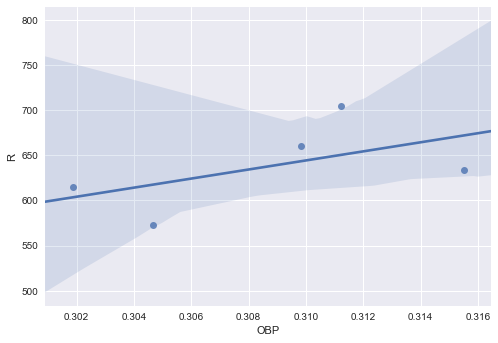

In [154]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=teamInfo['OBP'].head(), y=teamInfo['R'].head())

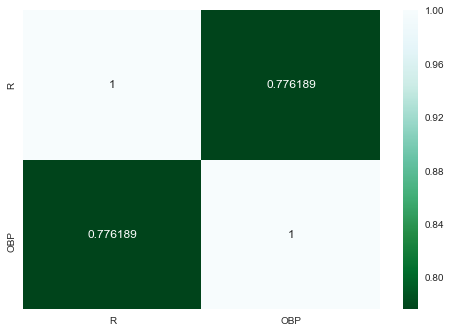

In [155]:
sns.heatmap(teamInfo[['R', 'OBP']].corr(), annot=True, fmt="g", cmap='BuGn_r')

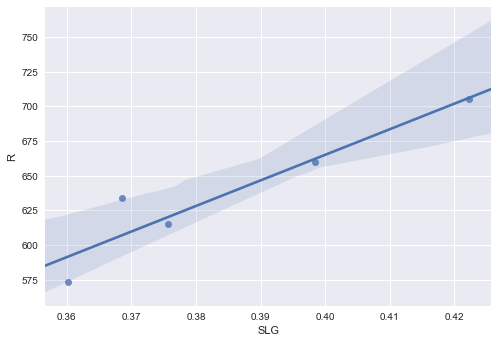

In [156]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=teamInfo['SLG'].head(), y=teamInfo['R'].head())

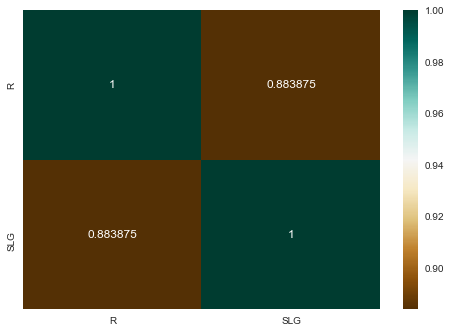

In [157]:
sns.heatmap(teamInfo[['R', 'SLG']].corr(), annot=True, fmt="g", cmap='BrBG')

In [158]:
teamInfo[['BA', 'SLG']].corr()

BA       SLG
BA   1.000000  0.644577
SLG  0.644577  1.000000

In [159]:
teamInfo[['BA', 'OBP']].corr()

BA       OBP
BA   1.000000  0.753933
OBP  0.753933  1.000000

In [160]:
teamInfo[['BA', 'W']].corr()

BA        W
BA  1.00000  0.23868
W   0.23868  1.00000

In [161]:
teamInfo[['W', 'OBP']].corr()

W       OBP
W    1.000000  0.473533
OBP  0.473533  1.000000

In [162]:
teamInfo[['W', 'SLG']].corr()

W       SLG
W    1.000000  0.297764
SLG  0.297764  1.000000

In [163]:
#sumSalariesDF = salaryInfo.groupby(['teamID', 'yearID']).sum().sort_values('salary', ascending=False)
sumSalariesDF = salaryInfo.groupby(['teamID', 'yearID']).sum()
sumSalariesDF.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

In [164]:
#salariesSummed = sumSalariesDF.sort_values('salary', ascending=False)
salariesSummed = sumSalariesDF.reset_index()
salariesSummed.head()

teamID  yearID    salary
0    ANA    1997  31135472
1    ANA    1998  41281000
2    ANA    1999  55388166
3    ANA    2000  51464167
4    ANA    2001  47535167

In [165]:
#League Stats
teamInfoAL = teamInfo[teamInfo['lgID'] == 'AL']
teamInfoNL = teamInfo[teamInfo['lgID'] == 'NL']
teamInfoAL.head()

yearID teamID               name                         park lgID  \
2747    2014    BAL  Baltimore Orioles  Oriole Park at Camden Yards   AL   
2748    2014    BOS     Boston Red Sox               Fenway Park II   AL   
2749    2014    CHA  Chicago White Sox          U.S. Cellular Field   AL   
2752    2014    CLE  Cleveland Indians            Progressive Field   AL   
2754    2014    DET     Detroit Tigers                Comerica Park   AL   

     divID  Rank    R   RA    G    ...       SF   HR   2B  3B   ERA        BA  \
2747     E     1  705  593  162    ...     36.0  211  264  16  3.43  0.256254   
2748     E     5  634  715  162    ...     52.0  123  282  20  4.01  0.244100   
2749     C     4  660  758  162    ...     38.0  155  279  32  4.29  0.252571   
2752     C     3  669  653  162    ...     49.0  142  284  23  3.56  0.253094   
2754     C     1  757  705  162    ...     61.0  155  325  26  4.01  0.276554   

           OBP       SLG        WP       OPS  
2747  0.311239  0.422266  0.592593  0.733505  
2748  0.315501  0.368582  0.438272  0.684083  
2749  0.309838  0.398340  0.450617  0.708178  
2752  0.317180  0.388700  0.524691  0.705879  
2754  0.330851  0.426110  0.555556  0.756962  

[5 rows x 25 columns]

In [166]:
teamInfoNLTeamStats = teamInfoNL[['R','BA','OBP','SLG','OPS','HR','ERA']].describe()
teamInfoALTeamStats = teamInfoAL[['R','BA','OBP','SLG','OPS','HR','ERA']].describe()
teamInfoNLTeamStats.head()
teamInfoALTeamStats.head()

R         BA        OBP        SLG        OPS          HR  \
count   45.000000  45.000000  45.000000  45.000000  45.000000   45.000000   
mean   706.266667   0.255049   0.318072   0.408267   0.726339  172.177778   
std     61.082805   0.009177   0.009671   0.022715   0.029732   36.917777   
min    612.000000   0.241784   0.300337   0.366751   0.675933   95.000000   
25%    660.000000   0.247855   0.311239   0.394727   0.704450  146.000000   

             ERA  
count  45.000000  
mean    4.008444  
std     0.374979  
min     3.170000  
25%     3.750000

In [170]:
teamSummary = pd.merge(teamInfo, salariesSummed, on=['yearID', 'teamID'], how='inner')
teamSummaryAL = teamSummary[teamSummary['lgID'] == 'AL']
teamSummaryNL = teamSummary[teamSummary['lgID'] == 'NL']
#teamSummaryAL.head()

In [169]:
teamSummaryALSalary = teamSummaryAL[['yearID','teamID','name','Rank','lgID','divID','W','G' ,'R', 'WP', 'BA', 'HR', 'OBP', 'SLG','ERA' ,'salary']].sort_values('salary', ascending=False).head(20)
teamSummaryALWP = teamSummaryAL[['yearID','teamID','name','Rank','lgID','divID','W','G' ,'WP','R', 'BA', 'HR', 'OBP', 'SLG', 'ERA','salary']].sort_values('WP', ascending=False).head(20)
teamSummaryALWP.head(10)

yearID teamID                           name  Rank lgID divID   W    G  \
12    2014    LAA  Los Angeles Angels of Anaheim     1   AL     W  98  162   
2     2014    BAL              Baltimore Orioles     1   AL     E  96  162   
41    2015    KCA             Kansas City Royals     1   AL     C  95  162   
77    2016    TEX                  Texas Rangers     1   AL     W  95  162   
65    2016    CLE              Cleveland Indians     1   AL     C  94  161   
63    2016    BOS                 Boston Red Sox     1   AL     E  93  162   
58    2015    TOR              Toronto Blue Jays     1   AL     E  93  162   
9     2014    DET                 Detroit Tigers     1   AL     C  90  162   
62    2016    BAL              Baltimore Orioles     2   AL     E  89  162   
78    2016    TOR              Toronto Blue Jays     2   AL     E  89  162   

          WP    R        BA   HR       OBP       SLG   ERA     salary  
12  0.604938  773  0.259023  155  0.322148  0.406051  3.58  121988250  
2   0.592593  705  0.256254  211  0.311239  0.422266  3.43  103416000  
41  0.586420  724  0.268520  139  0.321769  0.412197  3.73  112107025  
77  0.586420  765  0.261719  215  0.321529  0.433303  4.37  176038723  
65  0.583851  777  0.261670  185  0.329033  0.429613  3.84   74311900  
63  0.574074  878  0.281834  208  0.348439  0.461199  4.00  188545761  
58  0.574074  891  0.268651  232  0.339629  0.457070  3.80  112992400  
9   0.555556  757  0.276554  155  0.330851  0.426110  4.01  152855500  
62  0.549383  744  0.255793  253  0.317029  0.443338  4.22  161863456  
78  0.549383  759  0.247855  221  0.329520  0.425808  3.78  138701700

In [171]:
teamSummaryNLSalary = teamSummaryNL[['yearID','teamID','name','Rank','lgID','divID','W','G' ,'R', 'WP', 'BA', 'HR', 'OBP', 'SLG','ERA' ,'salary']].sort_values('salary', ascending=False).head(20)
teamSummaryNLWP = teamSummaryNL[['yearID','teamID','name','Rank','lgID','divID','W','G' ,'WP','R', 'BA', 'HR', 'OBP', 'SLG', 'ERA','salary']].sort_values('WP', ascending=False).head(20)
teamSummaryNLWP.head(10)

yearID teamID                  name  Rank lgID divID    W    G        WP  \
55    2015    SLN   St. Louis Cardinals     1   NL     C  100  162  0.617284   
51    2015    PIT    Pittsburgh Pirates     2   NL     C   98  162  0.604938   
35    2015    CHN          Chicago Cubs     3   NL     C   97  162  0.598765   
29    2014    WAS  Washington Nationals     1   NL     E   96  162  0.592593   
13    2014    LAN   Los Angeles Dodgers     1   NL     W   94  162  0.580247   
43    2015    LAN   Los Angeles Dodgers     1   NL     W   92  162  0.567901   
48    2015    NYN         New York Mets     1   NL     E   90  162  0.555556   
25    2014    SLN   St. Louis Cardinals     1   NL     C   90  162  0.555556   
21    2014    PIT    Pittsburgh Pirates     2   NL     C   88  162  0.543210   
24    2014    SFN  San Francisco Giants     2   NL     W   88  162  0.543210   

      R        BA   HR       OBP       SLG   ERA     salary  
55  647  0.252735  137  0.321089  0.394420  2.94  119241500  
51  697  0.259634  140  0.323369  0.395667  3.21   88892499  
35  689  0.244218  171  0.321388  0.398106  3.36  115879310  
29  686  0.253158  152  0.320988  0.392999  3.03  131983680  
13  718  0.265468  134  0.332525  0.405755  3.40  217014600  
43  667  0.249954  187  0.326101  0.412628  3.44  215792000  
48  683  0.244436  177  0.311856  0.400036  3.43   96766683  
25  619  0.252672  105  0.320159  0.369149  3.50  120693000  
21  682  0.259393  156  0.329713  0.404444  3.47   77178000  
24  665  0.254753  132  0.310659  0.388195  3.50  163510167

In [ ]:
#Batting Info

In [134]:
battingInfo = battingInfo[battingInfo['yearID'] > 2013]
#battingInfo.reset_index()
battingInfo = battingInfo[['yearID', 'teamID', 'lgID', 'playerID','G', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']].fillna(0)
battingInfo.head()

yearID teamID lgID   playerID    G    H  BB   HBP   AB   SF  HR  2B  3B
98412    2014    OAK   AL   abadfe01   69    0   0   0.0    0  0.0   0   0   0
98413    2014    NYN   NL  abreubo01   78   33  20   0.0  133  2.0   1   9   0
98414    2014    CHA   AL  abreujo02  145  176  51  11.0  556  4.0  36  35   2
98415    2014    SFN   NL  abreuto01    3    0   0   0.0    4  0.0   0   0   0
98416    2014    NYA   AL  aceveal01   10    0   0   0.0    0  0.0   0   0   0

In [135]:
battingInfo['BA'] = battingInfo['H']/battingInfo['AB']
battingInfo['OBP'] = (battingInfo['H'] + battingInfo['BB'] + battingInfo['HBP']) / (battingInfo['AB'] + battingInfo['BB'] + battingInfo['HBP'] + battingInfo['SF'])
battingInfo['SLG'] = (battingInfo['H'] + battingInfo['2B'] + (2*battingInfo['3B']) + (3*battingInfo['HR'])) / battingInfo['AB']
#HR Ratio [HRRation]
battingInfo['HRRatio'] = battingInfo['HR']/battingInfo['AB']
#On Base Plus Slugging [OPS] - On Base Percentage + Slugging Average
battingInfo['OPS'] = battingInfo['OBP'] + battingInfo['SLG']
battingInfo.fillna(0).head()

yearID teamID lgID   playerID    G    H  BB   HBP   AB   SF  HR  2B  \
98412    2014    OAK   AL   abadfe01   69    0   0   0.0    0  0.0   0   0   
98413    2014    NYN   NL  abreubo01   78   33  20   0.0  133  2.0   1   9   
98414    2014    CHA   AL  abreujo02  145  176  51  11.0  556  4.0  36  35   
98415    2014    SFN   NL  abreuto01    3    0   0   0.0    4  0.0   0   0   
98416    2014    NYA   AL  aceveal01   10    0   0   0.0    0  0.0   0   0   

       3B        BA       OBP       SLG   HRRatio       OPS  
98412   0  0.000000  0.000000  0.000000  0.000000  0.000000  
98413   0  0.248120  0.341935  0.338346  0.007519  0.680281  
98414   2  0.316547  0.382637  0.580935  0.064748  0.963572  
98415   0  0.000000  0.000000  0.000000  0.000000  0.000000  
98416   0  0.000000  0.000000  0.000000  0.000000  0.000000

In [136]:
#sumSalariesDF = salaryInfo.groupby(['teamID', 'yearID']).sum().sort_values('salary', ascending=False)
sumSalariesPID = salaryInfo.groupby(['playerID', 'yearID']).sum()
sumSalariesPID.head()

salary
playerID  yearID         
aardsda01 2004     300000
          2007     387500
          2008     403250
          2009     419000
          2010    2750000

In [137]:
#salariesSummed = sumSalariesDF.sort_values('salary', ascending=False)
salariesSalary = sumSalariesPID.reset_index()
salariesSalary.head()

playerID  yearID   salary
0  aardsda01    2004   300000
1  aardsda01    2007   387500
2  aardsda01    2008   403250
3  aardsda01    2009   419000
4  aardsda01    2010  2750000

In [172]:
joinPlayer = pd.merge(battingInfo, salariesSalary, on=['yearID', 'playerID'], how='inner').fillna(0)
ALTopPlayers = joinPlayer[joinPlayer['lgID']=='AL'].sort_values('salary', ascending=False)
NLTopPlayers = joinPlayer[joinPlayer['lgID']=='NL'].sort_values('salary', ascending=False)
NLTopPlayerswithNames = pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','playerID']], NLTopPlayers, on=['playerID'], how='inner').fillna(0).sort_values('salary', ascending=False)
ALTopPlayerswithNames = pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','playerID']], ALTopPlayers, on=['playerID'], how='inner').fillna(0).sort_values('salary', ascending=False)
NLTopPlayerswithNames.head()

nameFirst  nameLast       nameGiven   playerID  yearID  stint teamID  \
6867   Clayton   Kershaw  Clayton Edward  kershcl01    2016      1    LAN   
6868   Clayton   Kershaw  Clayton Edward  kershcl01    2015      1    LAN   
4921      Zack   Greinke  Donald Zachary  greinza01    2016      1    ARI   
2318    Yoenis  Cespedes          Yoenis  cespeyo01    2016      1    NYN   
4922      Zack   Greinke  Donald Zachary  greinza01    2014      1    LAN   

     lgID    G   AB    ...      SB   CS  BB     SO  IBB  HBP   SH   SF  GIDP  \
6867   NL   23   46    ...     0.0  0.0   1   12.0  0.0  0.0  3.0  0.0   0.0   
6868   NL   34   71    ...     0.0  0.0   2   23.0  0.0  1.0  5.0  0.0   2.0   
4921   NL   27   52    ...     1.0  0.0   3    9.0  0.0  0.0  3.0  2.0   0.0   
2318   NL  132  479    ...     3.0  1.0  51  108.0  8.0  7.0  0.0  6.0  14.0   
4922   NL   32   60    ...     0.0  0.0   5   11.0  0.0  0.0  4.0  0.0   0.0   

        salary  
6867  33000000  
6868  32571000  
4921  31799030  
2318  27328046  
4922  26000000  

[5 rows x 26 columns]

In [173]:
ALHR = joinPlayer[joinPlayer['lgID']=='AL'].sort_values('HR', ascending=False)
NLHR = joinPlayer[joinPlayer['lgID']=='NL'].sort_values('HR', ascending=False)
ALplt=ALHR.set_index('yearID')
ALplt1 = ALplt[['HR']].groupby(['yearID']).sum()
ALplt1.head()

HR
yearID      
1985    1957
1986    2232
1987    2194
1988    1815
1989    1671

In [178]:
pitchInfo = pitchingInfo[pitchingInfo['yearID'] >= 1985]
pitchInfo = pitchInfo[['yearID', 'teamID','lgID' ,'playerID', 'W', 'L', 'G', 'BAOpp', 'ERA', 'R','CG', 'SHO','SV', 'H']].fillna(0)
pitchInfo.head()

yearID teamID lgID   playerID   W  L   G  BAOpp   ERA   R  CG  SHO  SV  \
24980    1985    BAL   AL   aasedo01  10  6  54   0.25  3.78  44   0    0  14   
24981    1985    CHN   NL  abregjo01   1  1   6   0.35  6.38  18   0    0   0   
24982    1985    TOR   AL  ackerji01   7  2  61   0.26  3.23  35   0    0  10   
24983    1985    CHA   AL  agostju01   4  3  54   0.21  3.58  27   0    0   1   
24984    1985    NYN   NL  aguilri01  10  7  21   0.25  3.24  49   2    0   0   

         H  
24980   83  
24981   32  
24982   86  
24983   45  
24984  118

In [179]:
pitchPlayer = pd.merge(pitchInfo, salariesSalary, on=['yearID', 'playerID'], how='inner').fillna(0)
ALTopPitchers = pitchPlayer[pitchPlayer['lgID']=='AL'].sort_values('salary', ascending=False)
NLTopPitchers = pitchPlayer[pitchPlayer['lgID']=='NL'].sort_values('salary', ascending=False)
NLTopPitcherswithNames = pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','playerID']], NLTopPitchers, on=['playerID'], how='inner').fillna(0).sort_values('salary', ascending=False)
ALTopPitcherswithNames = pd.merge(playerInfo[['nameFirst','nameLast','nameGiven','playerID']], ALTopPitchers, on=['playerID'], how='inner').fillna(0).sort_values('salary', ascending=False)
NLTopPitcherswithNames.head()
ALTopPitcherswithNames.head()

nameFirst   nameLast      nameGiven   playerID  yearID teamID lgID   W  \
4555     David      Price   David Taylor  priceda01    2016    BOS   AL  17   
5896    Justin  Verlander  Justin Brooks  verlaju01    2016    DET   AL  16   
5897    Justin  Verlander  Justin Brooks  verlaju01    2015    DET   AL   5   
2430     Felix  Hernandez  Felix Abraham  hernafe02    2016    SEA   AL  11   
2431     Felix  Hernandez  Felix Abraham  hernafe02    2015    SEA   AL  18   

      L   G  BAOpp   ERA    R  CG  SHO  SV    H    salary  
4555  9  35  0.258  3.99  106   2    0   0  227  30000000  
5896  9  34  0.207  3.04   81   2    0   0  171  28000000  
5897  8  20  0.229  3.38   56   1    1   0  113  28000000  
2430  8  25  0.239  3.82   76   0    0   0  138  25857143  
2431  9  31  0.240  3.53   80   2    2   0  180  24857000

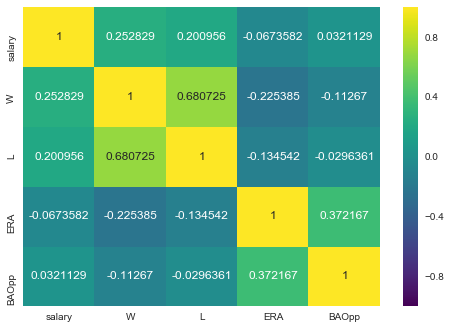

In [180]:
sns.heatmap(NLTopPitcherswithNames[['salary', 'W', 'L', 'ERA', 'BAOpp']].corr(), annot=True, fmt="g", cmap='viridis')

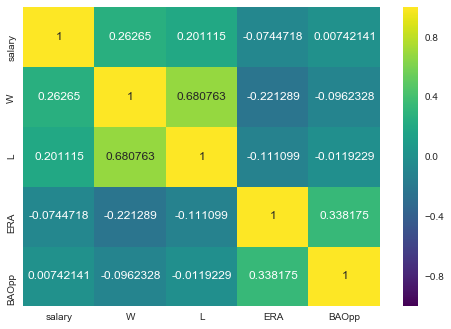

In [181]:
sns.heatmap(ALTopPitcherswithNames[['salary', 'W', 'L', 'ERA', 'BAOpp']].corr(), annot=True, fmt="g", cmap='viridis')

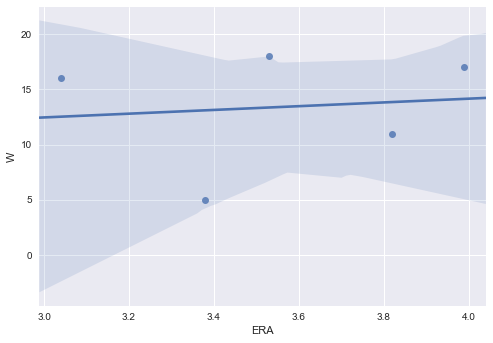

In [182]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=ALTopPitchers['ERA'].head(), y=ALTopPitchers['W'].head())

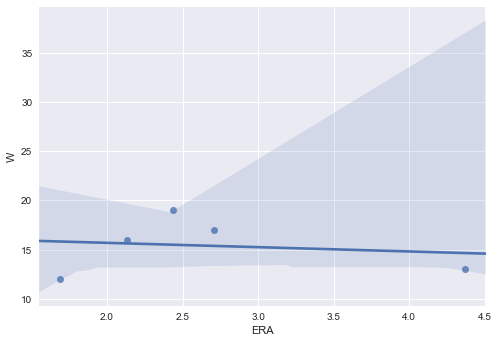

In [183]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=NLTopPitchers['ERA'].head(), y=NLTopPitchers['W'].head())

References:
https://www.pinstripealley.com/2010/12/23/1892608/baseball-statistics-and-acronyms-explained
https://pandas.pydata.org/pandas-docs/stable/visualization.html
https://www.baseball-reference.com/leagues/MLB/2012.shtml